In [1]:
import sys, os
module_rootdir = '../../..'
dataset_rootdir = '../../../..'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.kitti_dataset_utils.kitti_remap_utils import load_all_sequence_groundtruths_json
from modules.dataset_utils.kitti_dataset_utils.kitti_dataset_summary import (
    obj_box_summary, aggregated_bboxes, sort_according_to_box_criteria)
from modules.plot.viz_annotation import vizualize_bbox

In [2]:
gt_labels_train, _, _ = load_all_sequence_groundtruths_json(
    config_dataset.kitti_train_sequences_folders, 
    config_dataset.kitti_remapped_label_file_path, 
    label_rootdir, 
    dataset_rootdir)

gt_labels_val, _, _ = load_all_sequence_groundtruths_json(
    config_dataset.kitti_val_sequences_folders, 
    config_dataset.kitti_remapped_label_file_path, 
    label_rootdir, 
    dataset_rootdir)

Loading JSON file .. please wait
Sequence: 0000
Sequence: 0001
Sequence: 0002
Sequence: 0003
Sequence: 0004
Sequence: 0005
Sequence: 0006
Sequence: 0008
Sequence: 0009
Sequence: 0011
Sequence: 0012
Sequence: 0015
Sequence: 0016
Sequence: 0017
Sequence: 0019
Sequence: 0020
Loading JSON file .. please wait
Sequence: 0007
Sequence: 0010
Sequence: 0013
Sequence: 0014
Sequence: 0018


In [3]:
bbox_summary = obj_box_summary(gt_labels_train)
boxes_all, obj_class_all, box_area_all, box_aspect_ratio_all, image_paths_all = aggregated_bboxes(bbox_summary)

In [4]:
boxes_sorted, obj_class_sorted, box_area_sorted, box_aspect_ratio_sorted, image_paths_sorted \
    = sort_according_to_box_criteria(boxes_all, obj_class_all, box_area_all, box_aspect_ratio_all, image_paths_all, \
                                     sorting_criteria='box_area', order='ascending')

box_area_sorted[:100]

array([ 1.5003393, 20.322977 , 21.368973 , 33.98901  , 46.257534 ,
       54.284473 , 59.276924 , 67.91023  , 75.27207  , 75.27207  ,
       75.27207  , 75.34939  , 75.96199  , 76.21296  , 76.30008  ,
       82.79901  , 83.47051  , 83.64785  , 83.64785  , 83.64785  ,
       83.64785  , 83.64785  , 83.64785  , 83.64785  , 83.64785  ,
       84.68107  , 84.778015 , 87.42786  , 87.42786  , 87.42786  ,
       87.42786  , 87.42786  , 87.42786  , 87.42786  , 87.42786  ,
       87.42786  , 90.32616  , 90.32616  , 90.32616  , 90.40383  ,
       90.40413  , 90.40413  , 90.40413  , 90.40413  , 90.40413  ,
       90.40413  , 90.40413  , 90.40413  , 90.40413  , 90.404305 ,
       90.404305 , 90.404305 , 90.404305 , 90.404305 , 90.44302  ,
       93.1489   , 93.1489   , 93.1489   , 93.1489   , 93.23645  ,
       93.25608  , 94.09009  , 94.18659  , 94.18659  , 94.18659  ,
       94.18659  , 94.18659  , 94.18659  , 94.18659  , 94.18659  ,
       94.18659  , 94.18659  , 94.18659  , 94.18659  , 94.1865

box aspect ratio : 0.008206508122384548
box area         : 1.5003392696380615
box width        : 0.1109619140625
box height       : 13.521209716796875
box class        : person


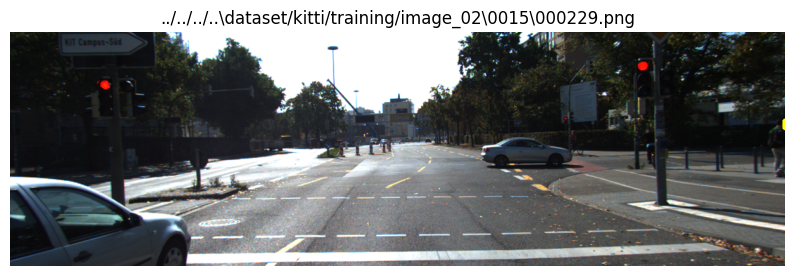

box aspect ratio : 0.019689179956912994
box area         : 20.32297706604004
box width        : 0.632568359375
box height       : 32.127716064453125
box class        : vehicle


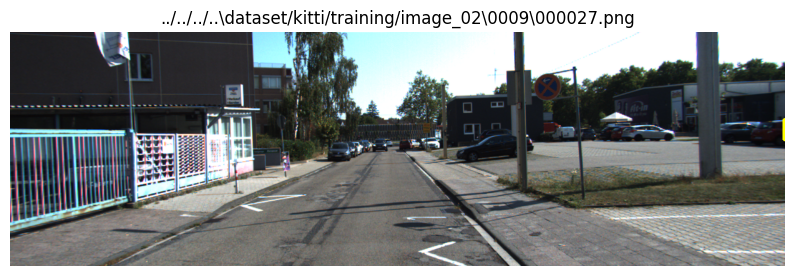

box aspect ratio : 0.01969894766807556
box area         : 21.368972778320312
box width        : 0.6488037109375
box height       : 32.93595886230469
box class        : vehicle


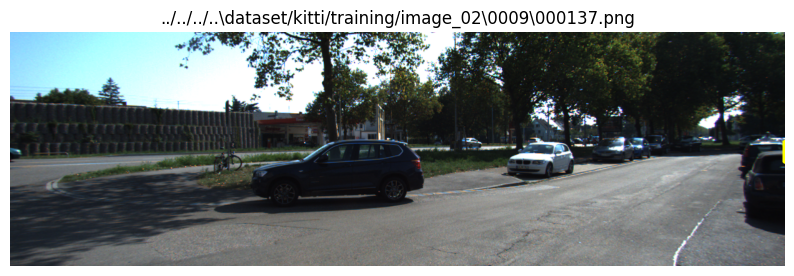

In [5]:
N1 = 0; N2 = 3
sel_boxes_area = box_area_sorted[N1:N2]
sel_boxes_aspect_ratio = box_aspect_ratio_sorted[N1:N2]
sel_boxes = boxes_sorted[N1:N2]
sel_image_paths = image_paths_sorted[N1:N2]
sel_obj_class = obj_class_sorted[N1:N2]

boxes_w = sel_boxes[:, 2] - sel_boxes[:, 0]
boxes_h = sel_boxes[:, 3] - sel_boxes[:, 1]

for idx, (img_path, obj_label) in enumerate(zip(sel_image_paths, sel_obj_class)):
    print('='*100)
    print(f'box aspect ratio : {sel_boxes_aspect_ratio[idx]}')
    print(f'box area         : {sel_boxes_area[idx]}') 
    print(f'box width        : {boxes_w[idx]}') 
    print(f'box height       : {boxes_h[idx]}') 
    print(f'box class        : {obj_label}')
    vizualize_bbox(img_path, sel_boxes[idx:idx+1], figsize=(10,10))

In [6]:
boxes_sorted, obj_class_sorted, box_area_sorted, box_aspect_ratio_sorted, image_paths_sorted \
    = sort_according_to_box_criteria(boxes_all, obj_class_all, box_area_all, box_aspect_ratio_all, image_paths_all, \
                                     sorting_criteria='box_aspect_ratio', order='ascending')

box_aspect_ratio_sorted[:100]

array([0.00820651, 0.0082962 , 0.00868696, 0.0089684 , 0.00918064,
       0.00934672, 0.011163  , 0.01152677, 0.01198873, 0.01250903,
       0.01258272, 0.0125946 , 0.01342635, 0.01959195, 0.01965045,
       0.01966166, 0.01967917, 0.01968918, 0.01969895, 0.01998665,
       0.02105773, 0.02243502, 0.02772532, 0.03033853, 0.03160763,
       0.03994673, 0.04026239, 0.04133468, 0.04249698, 0.04260898,
       0.04504262, 0.04523123, 0.04869973, 0.0538449 , 0.05431798,
       0.05541466, 0.05557732, 0.05579697, 0.05827103, 0.05829587,
       0.0593306 , 0.06057077, 0.06297354, 0.06600195, 0.06601176,
       0.06799906, 0.06956   , 0.07218029, 0.0725586 , 0.07335619,
       0.07535093, 0.07845937, 0.08035332, 0.08039849, 0.08478116,
       0.08611734, 0.08664041, 0.08717403, 0.09024995, 0.09380502,
       0.09385254, 0.09485961, 0.09680891, 0.0972576 , 0.10138366,
       0.10408959, 0.10482804, 0.10639986, 0.1068313 , 0.11070441,
       0.1117221 , 0.1151711 , 0.11550687, 0.11705985, 0.11750

idx: 0
box aspect ratio : 0.008206508122384548
box area         : 1.5003392696380615
box width        : 0.1109619140625
box height       : 13.521209716796875
box class        : person


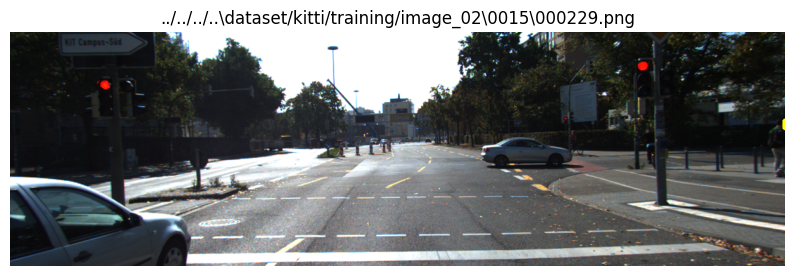

idx: 1
box aspect ratio : 0.008296199142932892
box area         : 1154.241943359375
box width        : 3.094482421875
box height       : 373.0
box class        : vehicle


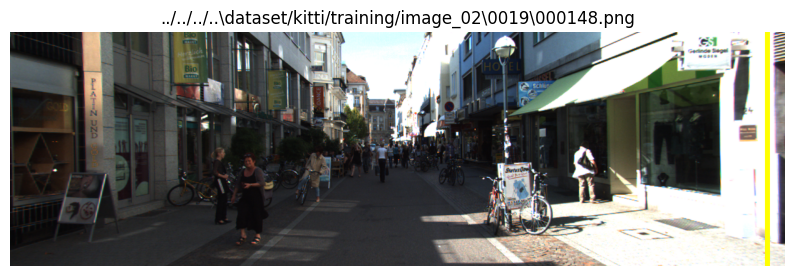

idx: 2
box aspect ratio : 0.008686955086886883
box area         : 1208.607421875
box width        : 3.240234375
box height       : 373.0
box class        : vehicle


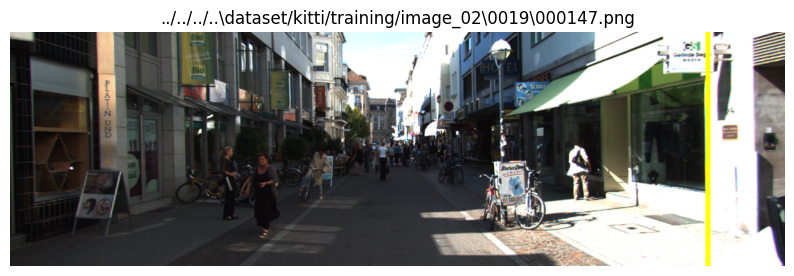

In [7]:
N1 = 0; N2 = 3
sel_boxes_area = box_area_sorted[N1:N2]
sel_boxes_aspect_ratio = box_aspect_ratio_sorted[N1:N2]
sel_boxes = boxes_sorted[N1:N2]
sel_image_paths = image_paths_sorted[N1:N2]
sel_obj_class = obj_class_sorted[N1:N2]

boxes_w = sel_boxes[:, 2] - sel_boxes[:, 0]
boxes_h = sel_boxes[:, 3] - sel_boxes[:, 1]

for idx, (img_path, obj_label) in enumerate(zip(sel_image_paths, sel_obj_class)):
    print('='*100)
    print(f'idx: {idx}')
    print(f'box aspect ratio : {sel_boxes_aspect_ratio[idx]}')
    print(f'box area         : {sel_boxes_area[idx]}') 
    print(f'box width        : {boxes_w[idx]}') 
    print(f'box height       : {boxes_h[idx]}') 
    print(f'box class        : {obj_label}')
    vizualize_bbox(img_path, sel_boxes[idx:idx+1], figsize=(10,10))

In [8]:
boxes_sorted, obj_class_sorted, box_area_sorted, box_aspect_ratio_sorted, image_paths_sorted \
    = sort_according_to_box_criteria(boxes_all, obj_class_all, box_area_all, box_aspect_ratio_all, image_paths_all, \
                                     sorting_criteria='box_aspect_ratio', order='descending')

box_aspect_ratio_sorted[:100]

array([14.73532 , 14.042859, 14.040887, 13.761651, 13.411158, 12.860355,
       12.802613, 12.679533, 12.501932, 12.283042, 11.937435, 11.845581,
       11.518136, 11.486887, 11.388866, 11.140112, 11.140112, 11.140112,
       11.140112, 11.140112, 11.140112, 11.140112, 11.140112, 11.140112,
       11.140112, 11.140112, 11.140112, 11.140112, 11.140112, 11.140112,
       11.140112, 11.140112, 11.140112, 11.140112, 11.140112, 11.140112,
       11.140112, 11.140112, 11.140112, 11.140112, 11.140112, 11.140112,
       11.140112, 11.140112, 11.140112, 11.140112, 11.140112, 11.140112,
       11.140112, 11.140112, 11.140112, 11.140112, 11.140112, 11.140112,
       11.140112, 11.140112, 11.140112, 10.817635, 10.817635, 10.817635,
       10.817635, 10.817635, 10.817635, 10.817635, 10.817635, 10.817635,
       10.817635, 10.817635, 10.817635, 10.817635, 10.817635, 10.817635,
       10.817635, 10.817635, 10.817635, 10.817635, 10.817635, 10.817635,
       10.817635, 10.817635, 10.817635, 10.817635, 

idx: 0
box aspect ratio : 14.735320091247559
box area         : 9357.515625
box width        : 371.33001708984375
box height       : 25.199996948242188
box class        : DontCare


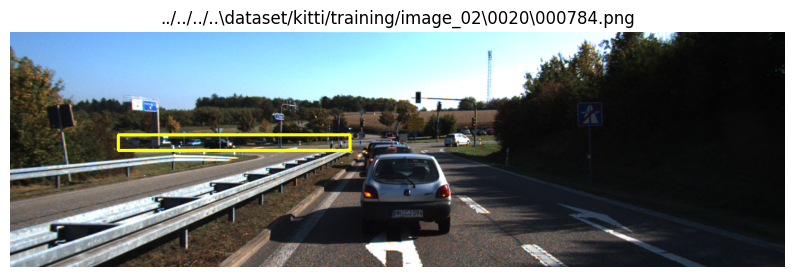

idx: 1
box aspect ratio : 14.042859077453613
box area         : 8917.775390625
box width        : 353.8800048828125
box height       : 25.199996948242188
box class        : DontCare


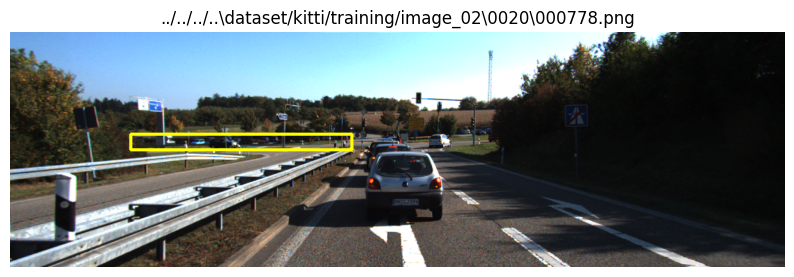

idx: 2
box aspect ratio : 14.040886878967285
box area         : 9616.1650390625
box width        : 367.4499816894531
box height       : 26.169998168945312
box class        : DontCare


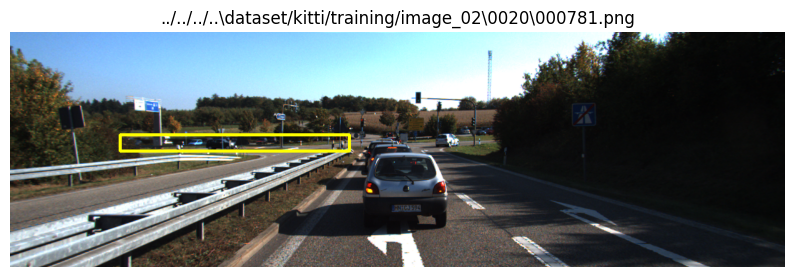

In [9]:
N1 = 0; N2 = 3
sel_boxes_area = box_area_sorted[N1:N2]
sel_boxes_aspect_ratio = box_aspect_ratio_sorted[N1:N2]
sel_boxes = boxes_sorted[N1:N2]
sel_image_paths = image_paths_sorted[N1:N2]
sel_obj_class = obj_class_sorted[N1:N2]

boxes_w = sel_boxes[:, 2] - sel_boxes[:, 0]
boxes_h = sel_boxes[:, 3] - sel_boxes[:, 1]

for idx, (img_path, obj_label) in enumerate(zip(sel_image_paths, sel_obj_class)):
    print('='*100)
    print(f'idx: {idx}')
    print(f'box aspect ratio : {sel_boxes_aspect_ratio[idx]}')
    print(f'box area         : {sel_boxes_area[idx]}') 
    print(f'box width        : {boxes_w[idx]}') 
    print(f'box height       : {boxes_h[idx]}') 
    print(f'box class        : {obj_label}')
    vizualize_bbox(img_path, sel_boxes[idx:idx+1], figsize=(10,10))